## Table of Content:
* [Problem Statement](#problem-statement)
* [Goals of the Case Study](#goals)
* [Understanding Data](#understanding)
* [Identification of variables and data types](#identification)
* [Data Cleaning](#data-cleaning)
    * [Dropping column that are having high percentage of missing values](#dropping-missing)
    * [Checking the number of unique categories in each categorical column](#)
* [Data Preparation](#data-preparation)
    * [Creating dummies for all categorical columns](#create-dummies)
    * [Performing train-test split](#train-test)
    * [Performing Scaling](#scaling)
* [Modelling](#)
    * [RFE to perform variable selection](#rfe)
    * [Building a Logistic Regression model with good sensitivity](#modelling)
    * [Plotting ROC Curve ](#model-performance)
    * [Finding Optimal Cutoff Point](#optimal)
    * [Prediction on Test Set ](#prediction-test)
* [Final Inference](#final)

## Problem Statement <a class="anchor" id="problem-statement"></a>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="funnel.jpeg">

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study <a class="anchor" id="goals"></a>

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

   

## Understanding Data <a class="anchor" id="understanding"></a>

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# All library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Reading csv 
# let's call it leads for simplicity

leads = pd.read_csv('Leads.csv')

In [4]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [6]:
leads.shape

(9240, 35)

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [8]:
leads.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
leads.describe(include=[np.number])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
# Numerical and Categorical values
leads.describe(include='all')

Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit Last Activity Country  ...  \
count            9103.000000          9137    6779  ...   
unique                   NaN            17      38  ...   
top                      NaN  Email Opened   India  ...   
freq                     NaN          3437    6492  ...   
mean                2.362820           NaN     NaN  ...   
std                 2.161418           NaN     NaN  ...   
min                 0.000000           NaN     NaN  ...   
25%                 1.000000           NaN     NaN  ...   
50%                 2.000000           NaN     NaN  ...   
75%                 3.000000           NaN     NaN  ...   
max                55.000000           NaN     NaN  ...   

       Get updates on DM Content Lead Profile    City  \
count                       9240         6531    7820   
unique                         1            6       7   
top                           No       Select  Mumbai   
freq                        9240         4146    3222   
mean                         NaN          NaN     NaN   
std                          NaN          NaN     NaN   
min                          NaN          NaN     NaN   
25%                          NaN          NaN     NaN   
50%                          NaN          NaN     NaN   
75%                          NaN          NaN     NaN   
max                          NaN          NaN     NaN   

       Asymmetrique Activity Index Asymmetrique Profile Index  \
count                         5022                       5022   
unique                           3                          3   
top                      02.Medium                  02.Medium   
freq                          3839                       2788   
mean                           NaN                        NaN   
std                            NaN                        NaN   
min                            NaN                        NaN   
25%                            NaN                        NaN   
50%                            NaN                        NaN   
75%                            NaN                        NaN   
max                            NaN                        NaN   

       Asymmetrique Activity Score Asymmetrique Profile Score  \
count                  5022.000000                5022.000000   
unique                         NaN                        NaN   
top 

## Identification of variables and data types <a class="anchor" id="identification"></a>

In [11]:
# since we are unable to see all columns
for column in leads:
    print(column,'\t',leads[column].dtypes)

Lead Origin 	 object
Lead Source 	 object
Do Not Email 	 object
Do Not Call 	 object
Converted 	 int64
TotalVisits 	 float64
Total Time Spent on Website 	 int64
Page Views Per Visit 	 float64
Last Activity 	 object
Country 	 object
Specialization 	 object
How did you hear about X Education 	 object
What is your current occupation 	 object
What matters most to you in choosing a course 	 object
Search 	 object
Magazine 	 object
Newspaper Article 	 object
X Education Forums 	 object
Newspaper 	 object
Digital Advertisement 	 object
Through Recommendations 	 object
Receive More Updates About Our Courses 	 object
Tags 	 object
Lead Quality 	 object
Update me on Supply Chain Content 	 object
Get updates on DM Content 	 object
Lead Profile 	 object
City 	 object
Asymmetrique Activity Index 	 object
Asymmetrique Profile Index 	 object
Asymmetrique Activity Score 	 float64
Asymmetrique Profile Score 	 float64
I agree to pay the amount through cheque 	 object
A free copy of Mastering The Intervi

### From Lead Data dictionary

| Variables                                        | Description                                                                                                                                                                       |
|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Prospect ID                                      | A unique ID with which the customer is identified.                                                                                                                                |
| Lead Number                                      | A lead number assigned to each lead procured.                                                                                                                                     |
| Lead Origin                                      | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.                                                            |
| Lead Source                                      | The source of the lead. Includes Google, Organic Search, Olark Chat, etc.                                                                                                         |
| Do Not Email                                     | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.                                                |
| Do Not Call                                      | An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.                                                 |
| Converted                                        | The target variable. Indicates whether a lead has been successfully converted or not.                                                                                             |
| TotalVisits                                      | The total number of visits made by the customer on the website.                                                                                                                   |
| Total Time Spent on Website                      | The total time spent by the customer on the website.                                                                                                                              |
| Page Views Per Visit                             | Average number of pages on the website viewed during the visits.                                                                                                                  |
| Last Activity                                    | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.                                                                                     |
| Country                                          | The country of the customer.                                                                                                                                                      |
| Specialization                                   | The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. |
| How did you hear about X Education               | The source from which the customer heard about X Education.                                                                                                                       |
| What is your current occupation                  | Indicates whether the customer is a student, umemployed or employed.                                                                                                              |
| What matters most to you in choosing this course | An option selected by the customer indicating what is their main motto behind doing this course.                                                                                  |
| Search                                           | Indicating whether the customer had seen the ad in any of the listed items.                                                                                                       |
| Magazine                                         |                                                                                                                                                                                   |
| Newspaper Article                                |                                                                                                                                                                                   |
| X Education Forums                               |                                                                                                                                                                                   |
| Newspaper                                        |                                                                                                                                                                                   |
| Digital Advertisement                            |                                                                                                                                                                                   |
| Through Recommendations                          | Indicates whether the customer came in through recommendations.                                                                                                                   |
| Receive More Updates About Our Courses           | Indicates whether the customer chose to receive more updates about the courses.                                                                                                   |
| Tags                                             | Tags assigned to customers indicating the current status of the lead.                                                                                                             |
| Lead Quality                                     | Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.                                                                 |
| Update me on Supply Chain Content                | Indicates whether the customer wants updates on the Supply Chain Content.                                                                                                         |
| Get updates on DM Content                        | Indicates whether the customer wants updates on the DM Content.                                                                                                                   |
| Lead Profile                                     | A lead level assigned to each customer based on their profile.                                                                                                                    |
| City                                             | The city of the customer.                                                                                                                                                         |
| Asymmetrique Activity Index                      | An index and score assigned to each customer based on their activity and their profile                                                                                            |
| Asymmetrique Profile Index                       |                                                                                                                                                                                   |
| Asymmetrique Activity Score                      |                                                                                                                                                                                   |
| Asymmetrique Profile Score                       |                                                                                                                                                                                   |
| I agree to pay the amount through cheque         | Indicates whether the customer has agreed to pay the amount through cheque or not.                                                                                                |
| a free copy of Mastering The Interview           | Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.                                                                                             |
| Last Notable Activity                            | The last notable acitivity performed by the student.                                                                                                                              |

In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

### Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [13]:
leads['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [14]:
leads['What is your current occupation'].isna().sum()

2690

In [15]:
leads['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [16]:
leads['How did you hear about X Education'].isna().sum()

2207

In [17]:
leads['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [18]:
leads['What matters most to you in choosing a course'].isna().sum()

2709

In [19]:
leads['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [20]:
leads['Tags'].isna().sum()

3353

In [21]:
leads['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [22]:
leads['Lead Quality'].isna().sum()

4767

In [23]:
leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [24]:
leads['City'].isna().sum()

1420

In [25]:
leads['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [26]:
leads['Asymmetrique Activity Index'].isna().sum()

4218

In [27]:
leads['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [28]:
leads['Asymmetrique Profile Index'].isna().sum()

4218

In [29]:
leads['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [30]:
leads['Asymmetrique Activity Score'].isna().sum()

4218

In [31]:
leads['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [32]:
leads['Asymmetrique Profile Score'].isna().sum()

4218

## Dropping column that are having high percentage of missing values <a class="anchor" id="identification"></a>

- **Specialization** has significant amount of nulls, but since its optional and may reflect have significance in model, we are not going to impute for now
- Removing columns which are significantly null
    - **How did you hear about X Education**
    - **Lead Quality**
    - **Asymmetrique Activity Index**
    - **Asymmetrique Profile Index**
    - **Asymmetrique Activity Score**
    - **Asymmetrique Profile Score**
    - **Lead Quality**

In [33]:
leads = leads.drop(columns=[
                'Lead Quality',
                'Asymmetrique Activity Index',
                'Asymmetrique Profile Index',
                'Asymmetrique Activity Score',
                'Asymmetrique Profile Score',
                'Lead Profile'])

In [34]:
leads.shape

(9240, 29)

In [35]:
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   
2             Email Opened   India  ...                    No   
3              Unreachable   India  ...                    No   
4        Converted to Lead   India  ...                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No  Select                                       No   
1                        No  Select                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 29 columns]

In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [37]:
# #imputing Nan values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

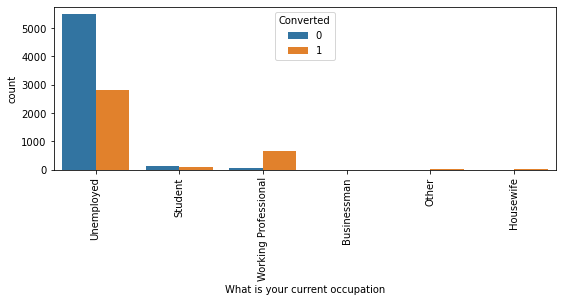

In [38]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(9,3))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [40]:
leads['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

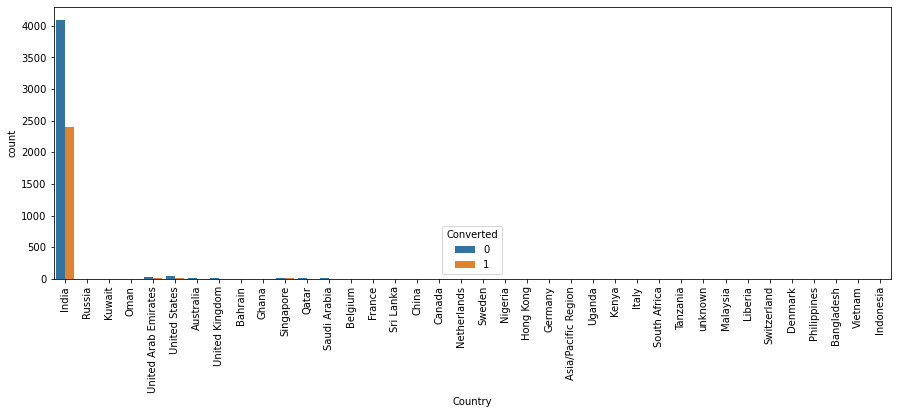

In [41]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
# because most of the enquiries are from India let replace Nan values
# to India
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [44]:
leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [45]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [46]:
leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising',
       'Not Specified', 'Supply Chain Management',
       'IT Projects Management', 'Finance Management',
       'Travel and Tourism', 'Human Resource Management',
       'Marketing Management', 'Banking, Investment And Insurance',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'Services Excellence',
       'Hospitality Management', 'Rural and Agribusiness',
       'Healthcare Management', 'E-Business'], dtype=object)

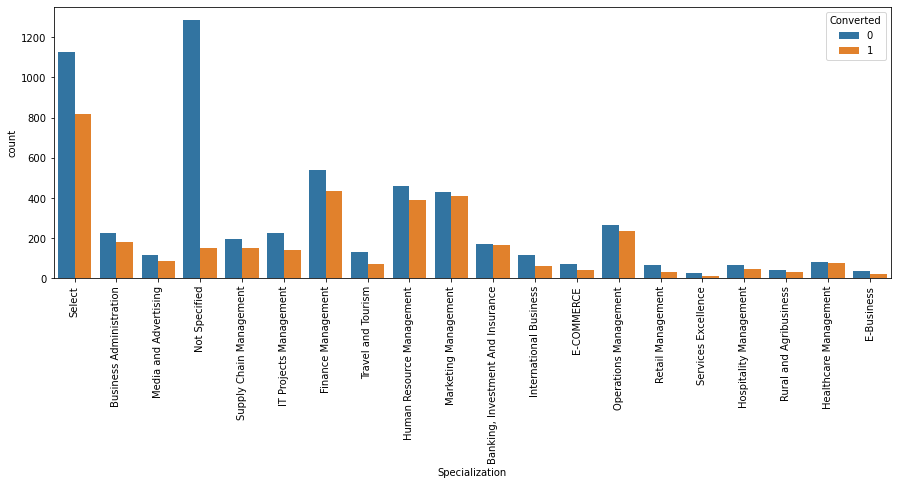

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
#checking value counts of Tags
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [49]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

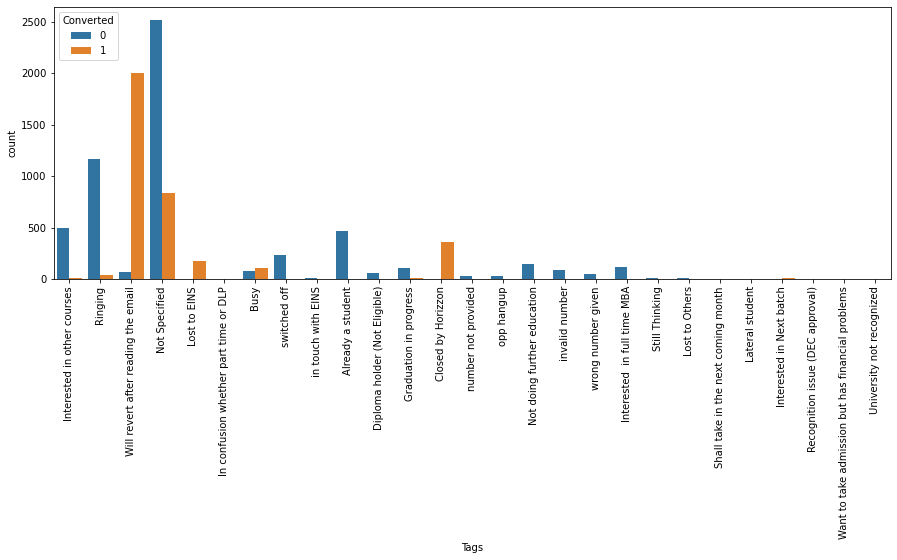

In [50]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [51]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [52]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [53]:
leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

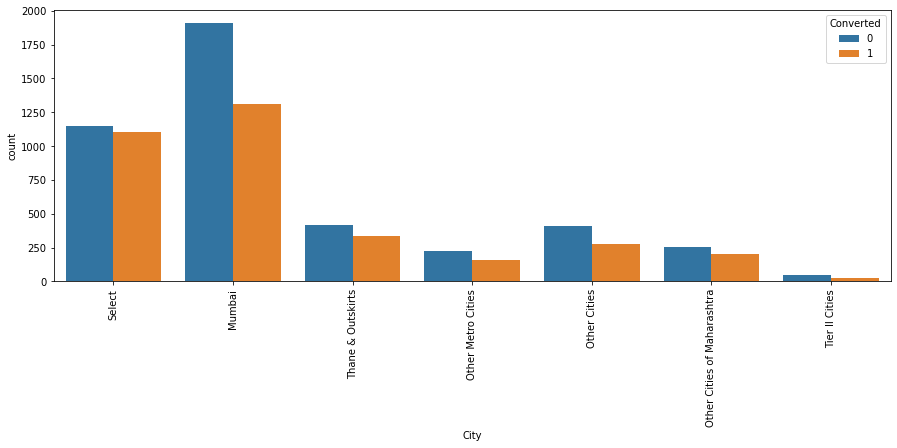

In [54]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
# As Mumbai is common, let
leads['City'].fillna('Mumbai', inplace=True)

In [56]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [58]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [59]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [60]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

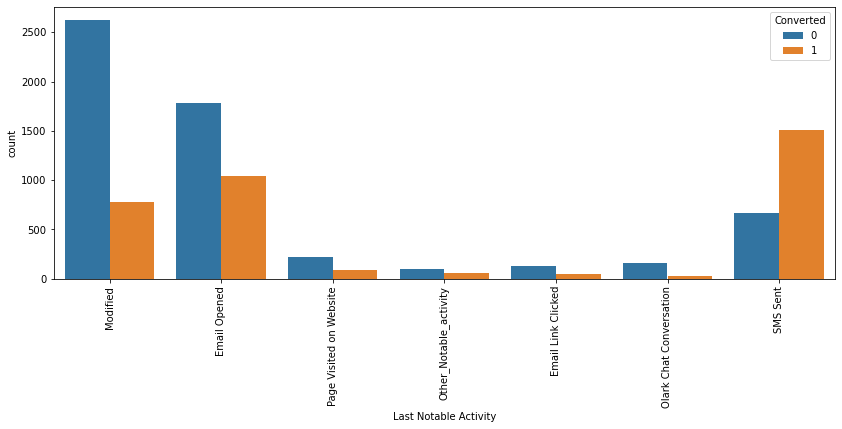

In [61]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [62]:
# checking the percentange of null values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [63]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [64]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [65]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4098
API                        2168
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

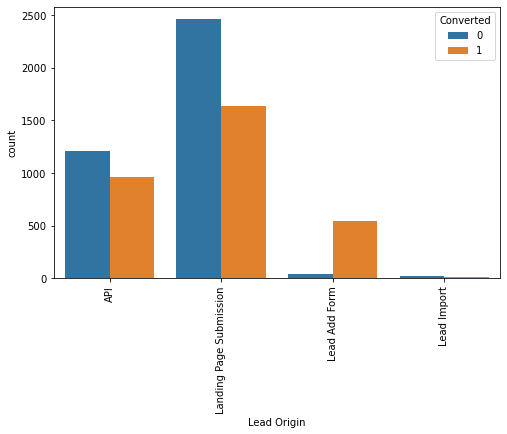

In [66]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

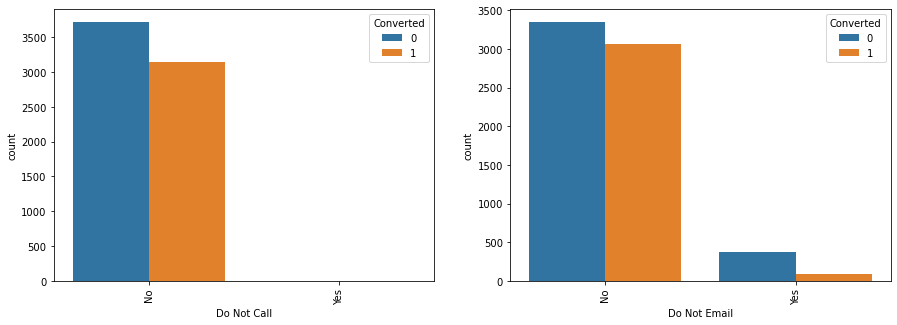

In [67]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [68]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     6872
Yes       2
Name: Do Not Call, dtype: int64

In [69]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     6412
Yes     462
Name: Do Not Email, dtype: int64

### Numerical Attributes Analysis

In [70]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

45.8539423916206

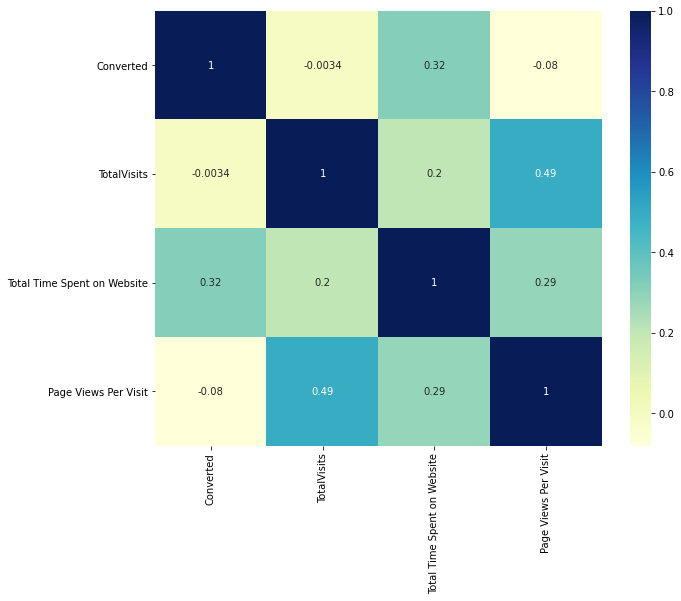

In [71]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

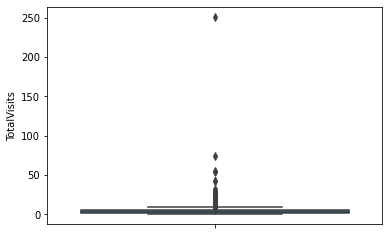

In [72]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [73]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    6874.000000
mean        3.703375
std         4.777703
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

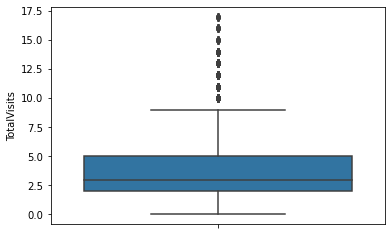

In [74]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [75]:
leads.shape

(6807, 29)

## Data Preparation <a class="anchor" id="data-preparation"></a>

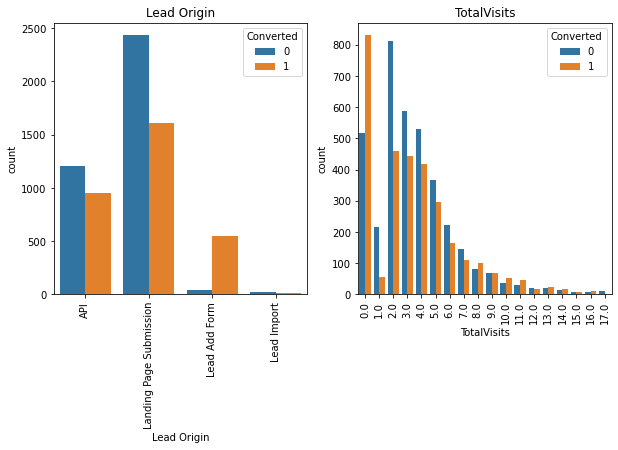

In [76]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='TotalVisits', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('TotalVisits')
plt.show()

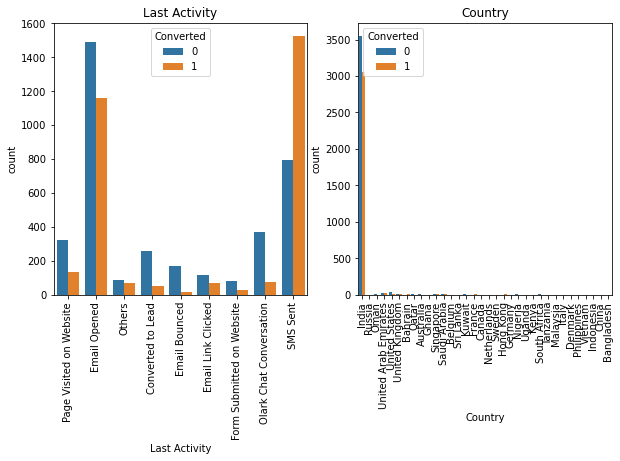

In [77]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

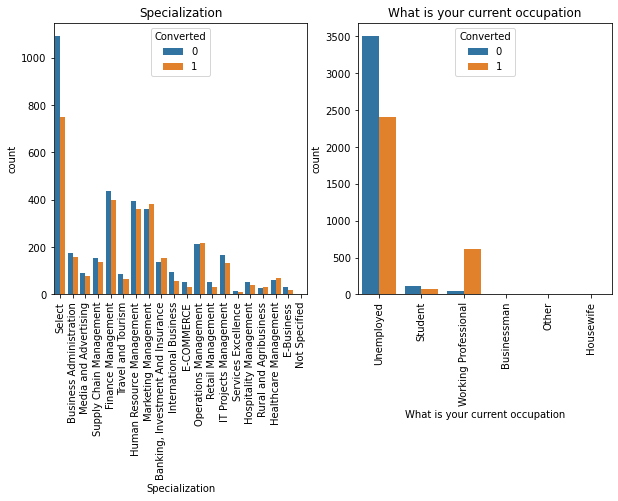

In [78]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

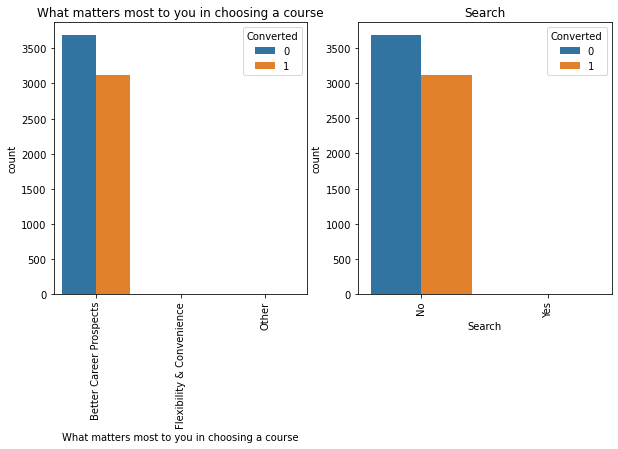

In [79]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

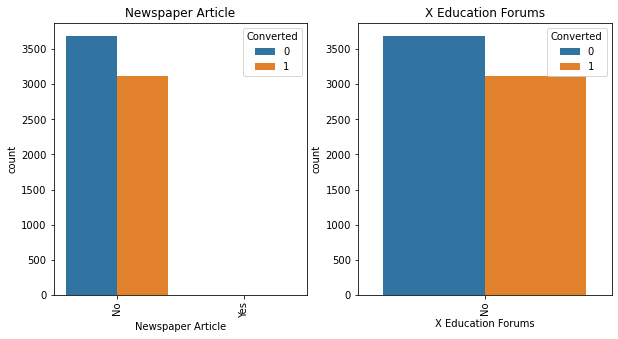

In [80]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

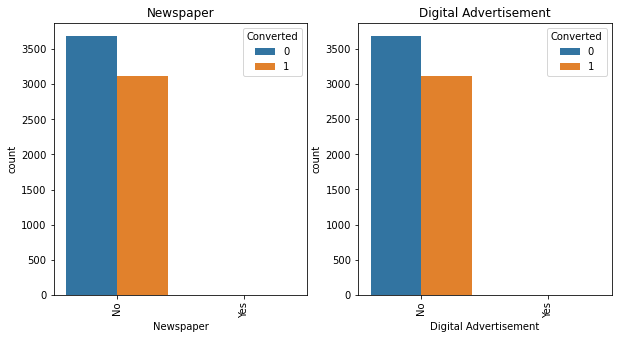

In [81]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

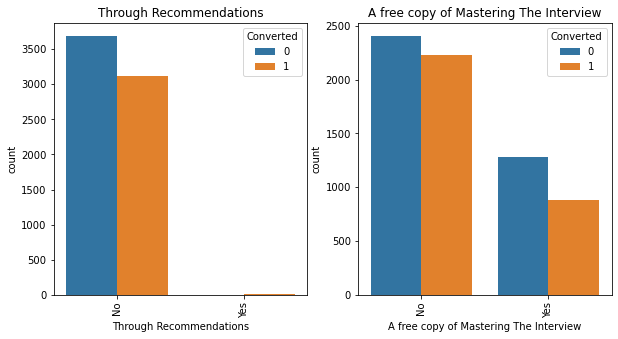

In [82]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

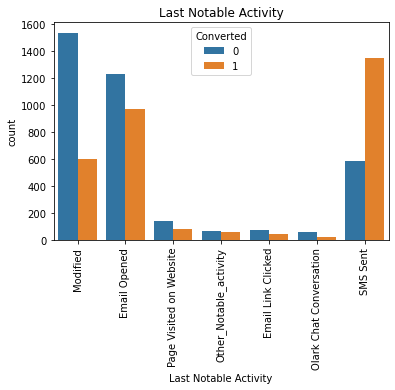

In [83]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

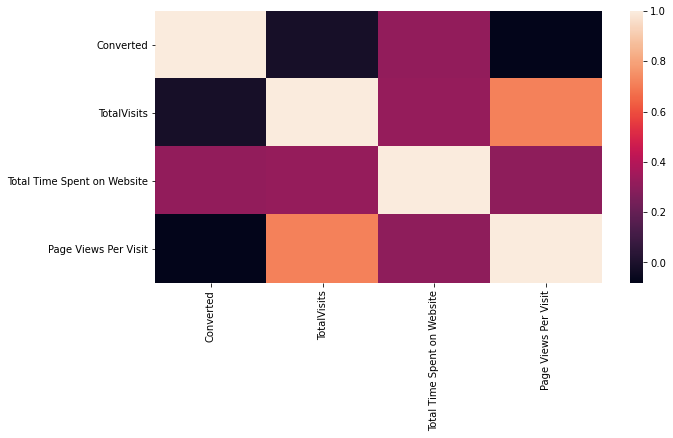

In [84]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

### Creating dummies for all categorical columns <a class="anchor" id="create-dummies"></a>

In [85]:
#getting a list of categorical columns

categorical_cols = leads.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [87]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Stud

In [88]:
# verification
leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'Finance Management',
       'Travel and Tourism', 'Human Resource Management',
       'Marketing Management', 'Banking, Investment And Insurance',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'IT Projects Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business',
       'Not Specified'], dtype=object)

In [89]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
leads = pd.concat([leads, dummy], axis = 1)

In [90]:
# verification
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'testone',
       'Press_Release', 'NC_EDM'], dtype=object)

In [91]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
leads = pd.concat([leads, dummy], axis = 1)

In [92]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [94]:
#dropping the original columns after dummy variable creation

leads.drop(categorical_cols,1,inplace = True)

In [95]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  ...  \
0                                        0  ...   
1                                        0  ...   
2                                        1  ...   
3                                        0  ...   
4                                        0  ...   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  Tags_Busy  \
0                                      1                       0          0   
1                                      0                       0          0   
2                                      0                       0          0   
3                                      0                       0          0   
4                                      0                       0          0   

   Tags_Closed by Horizzon  Tags_Interested in other courses  \
0                        0                                 1   
1                        0                                 0   
2                        0                                 0   
3                        0                                 0   
4                        0                                 0   

   Tags_Lost to EINS  Tags_Other_Tags  Tags_Ringing  \
0                  0                0             0   
1                  0                0             1   
2                  0                0             0   
3                  0                0             1   
4                  0                0             0   

   Tags_Will revert after reading the email  
0                                         0  
1                                         0  
2                                         1  
3                                         0  
4                                         1  

[5 rows x 72 columns]

### Performing train-test split <a class="anchor" id="train-test"></a>

In [96]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764 entries, 6054 to 7680
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4764 non-null   float64
 1   Total Time Spent on Website                           4764 non-null   int64  
 2   Page Views Per Visit                                  4764 non-null   float64
 3   Lead Origin_Landing Page Submission                   4764 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4764 non-null   uint8  
 5   Lead Origin_Lead Import                               4764 non-null   uint8  
 6   What is your current occupation_Housewife             4764 non-null   uint8  
 7   What is your current occupation_Other                 4764 non-null   uint8  
 8   What is your current occupation_Student               4

### Performing Scaling <a class="anchor" id="scaling"></a>

In [99]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6054    -0.495723                     0.871432             -0.262906   
2828     0.507516                     0.253616              1.210747   
1269    -1.164550                    -0.956945             -1.245341   
5120    -0.161310                     0.824872              0.228312   
7170     2.179583                     0.712053             -0.017297   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6054                                    0                          0   
2828                                    1                          0   
1269                                    0                          0   
5120                                    1                          0   
7170                                    0                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
6054                        0                                          0   
2828                        0                                          0   
1269                        0                                          0   
5120                        0                                          0   
7170                        0                                          0   

      What is your current occupation_Other  \
6054                                      0   
2828                                      0   
1269                                      0   
5120                                      0   
7170                                      0   

      What is your current occupation_Student  \
6054                                        0   
2828                                        1   
1269                                        0   
5120                                        0   
7170                                        0   

      What is your current occupation_Unemployed  ...  \
6054                                           1  ...   
2828                                           0  ...   
1269                                           1  ...   
5120                                           1  ...   
7170                                           1  ...   

      Last Activity_Olark Chat Conversation  \
6054                                      0   
2828                                      0   
1269                                      0   
5120                                      0   
7170                                      0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
6054                                      0                       0   
2828                                      0                       1   
1269                                      0                       1   
5120                                      0                       1   
7170                                      1                       0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
6054          0                        0                                 0   
2828          0                        0                                 0   
1269          0                        0                                 0   
5120          0                        0                                 0   
7170          0                        0                                 0   

      Tags_Lost to EINS  Tags_Other_Tags  Tags_Ringing  \
6054                  0                0             0   
2828                  0                0             0   
1269                  0                0             0   
5120                  0                0             0   
7170                  0                0             0   

      Tags_Will revert after reading the email  
6054                                         0  
2828                                         1  
1269                                         0  
5120                                  

### Modelling

### RFE to perform variable selection <a class="anchor" id="rfe"></a>

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('What is your current occupation_Housewife', False, 38),
 ('What is your current occupation_Other', False, 40),
 ('What is your current occupation_Student', False, 16),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 43),
 ('City_Other Cities of Maharashtra', False, 45),
 ('City_Other Metro Cities', False, 30),
 ('City_Select', False, 10),
 ('City_Thane & Outskirts', False, 47),
 ('City_Tier II Cities', False, 26),
 ('Specialization_Banking, Investment And Insurance', False, 46),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 36),
 ('Specialization_F

In [103]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Select', 'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_N

### Building a Logistic Regression model with good sensitivity  <a class="anchor" id="modelling"></a>

In [105]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4764
Model:                            GLM   Df Residuals:                     4748
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -793.28
Date:                Sun, 13 Jun 2021   Deviance:                       1586.6
Time:                        17:48:02   Pearson chi2:                 6.19e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1850      0.168     -1.100      0.271      -0.515       0.145
Total Time Spent on Website                              1.0817      0.076     14.304      0.000       0.933       1.230
Lead Origin_Landing Page Submission                     -1.2789      0.176     -7.264      0.000      -1.624      -0.934
Lead Origin_Lead Add Form                                1.4729      0.540      2.728      0.006       0.415       2.531
What is your current occupation_Working Professional     0.8881      0.408      2.179      0.029       0.089       1.687
Lead Source_Olark Chat                                   1.0578      0.225      4.708      0.000       0.617       1.498
Lead Source_Welingak Website                             2.4357      0.893      2.726      0.006       0.685       4.187
Last Activity_Email Bounced                             -1.2464      0.535     -2.328      0.020      -2.295      -0.197
Last Activity_Olark Chat Conversation                   -1.3592      0.305     -4.462      0.000      -1.956      -0.762
Last Activity_SMS Sent                                   1.6003      0.145     11.021      0.000       1.316       1.885
Tags_Closed by Horizzon                                 25.7440   1.34e+04      0.002      0.998   -2.62e+04    2.62e+04
Tags_Interested in other courses                        -3.2861      0.369     -8.897      0.000      -4.010      -2.562
Tags_Lost to EINS                                        4.1740      0.624      6.690      0.000       2.951       5.397
Tags_Other_Tags                                         -3.2363      0.227    -14.230      0.000      -3.682      -2.791
Tags_Ringing                                            -4.2575      0.294    -14.498      0.000      -4.833      -3.682
Tags_Will revert after reading the email                 3.7683      0.209     18.035      0.000       3.359       4.178
========================================================================================================================
"""

In [106]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [107]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4764
Model:                            GLM   Df Residuals:                     4749
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -893.98
Date:                Sun, 13 Jun 2021   Deviance:                       1788.0
Time:                        17:48:02   Pearson chi2:                 7.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1947      0.159      1.222      0.222      -0.118       0.507
Total Time Spent on Website                              1.1084      0.073     15.258      0.000       0.966       1.251
Lead Origin_Landing Page Submission                     -1.0785      0.167     -6.443      0.000      -1.407      -0.750
Lead Origin_Lead Add Form                                2.9169      0.382      7.628      0.000       2.167       3.666
What is your current occupation_Working Professional     1.7501      0.344      5.082      0.000       1.075       2.425
Lead Source_Olark Chat                                   0.9957      0.217      4.580      0.000       0.570       1.422
Lead Source_Welingak Website                             1.0167      0.803      1.267      0.205      -0.557       2.590
Last Activity_Email Bounced                             -1.3272      0.480     -2.765      0.006      -2.268      -0.387
Last Activity_Olark Chat Conversation                   -1.3458      0.280     -4.808      0.000      -1.894      -0.797
Last Activity_SMS Sent                                   1.2162      0.137      8.871      0.000       0.948       1.485
Tags_Interested in other courses                        -3.7701      0.368    -10.259      0.000      -4.490      -3.050
Tags_Lost to EINS                                        3.6093      0.620      5.818      0.000       2.393       4.825
Tags_Other_Tags                                         -3.6296      0.225    -16.122      0.000      -4.071      -3.188
Tags_Ringing                                            -4.6569      0.296    -15.734      0.000      -5.237      -4.077
Tags_Will revert after reading the email                 3.2108      0.196     16.394      0.000       2.827       3.595
========================================================================================================================
"""

In [108]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [109]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4764
Model:                            GLM   Df Residuals:                     4750
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -894.94
Date:                Sun, 13 Jun 2021   Deviance:                       1789.9
Time:                        17:48:02   Pearson chi2:                 7.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2000      0.160      1.253      0.210      -0.113       0.513
Total Time Spent on Website                              1.1109      0.073     15.253      0.000       0.968       1.254
Lead Origin_Landing Page Submission                     -1.0809      0.168     -6.443      0.000      -1.410      -0.752
Lead Origin_Lead Add Form                                3.1770      0.339      9.366      0.000       2.512       3.842
What is your current occupation_Working Professional     1.7298      0.345      5.010      0.000       1.053       2.407
Lead Source_Olark Chat                                   0.9946      0.218      4.565      0.000       0.568       1.422
Last Activity_Email Bounced                             -1.3253      0.480     -2.762      0.006      -2.266      -0.385
Last Activity_Olark Chat Conversation                   -1.3389      0.279     -4.797      0.000      -1.886      -0.792
Last Activity_SMS Sent                                   1.2209      0.137      8.921      0.000       0.953       1.489
Tags_Interested in other courses                        -3.7866      0.368    -10.278      0.000      -4.509      -3.065
Tags_Lost to EINS                                        3.6068      0.620      5.815      0.000       2.391       4.822
Tags_Other_Tags                                         -3.6461      0.226    -16.159      0.000      -4.088      -3.204
Tags_Ringing                                            -4.7098      0.296    -15.896      0.000      -5.291      -4.129
Tags_Will revert after reading the email                 3.2048      0.196     16.357      0.000       2.821       3.589
========================================================================================================================
"""

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
1                 Lead Origin_Landing Page Submission  2.42
12           Tags_Will revert after reading the email  2.06
7                              Last Activity_SMS Sent  1.64
10                                    Tags_Other_Tags  1.55
4                              Lead Source_Olark Chat  1.48
11                                       Tags_Ringing  1.40
0                         Total Time Spent on Website  1.38
2                           Lead Origin_Lead Add Form  1.34
3   What is your current occupation_Working Profes...  1.32
6               Last Activity_Olark Chat Conversation  1.25
8                    Tags_Interested in other courses  1.17
5                         Last Activity_Email Bounced  1.07
9                                   Tags_Lost to EINS  1.06

##### VIF value should be below 5 to prove if there is no multicollinearity among indicators, so everything seems fine

### Finding the optimal probability cutoff  <a class="anchor" id="modelling"></a>

In [112]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6054    0.762797
2828    0.978679
1269    0.794514
5120    0.988583
7170    0.985165
7545    0.007740
8475    0.993732
4036    0.532816
1218    0.004890
3578    0.975915
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76279656, 0.9786791 , 0.79451437, 0.98858275, 0.98516459,
       0.0077401 , 0.99373212, 0.53281569, 0.00489036, 0.97591517])

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          1        0.762797         6054
1          1        0.978679         2828
2          1        0.794514         1269
3          1        0.988583         5120
4          1        0.985165         7170

In [115]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          1        0.762797         6054          1
1          1        0.978679         2828          1
2          1        0.794514         1269          1
3          1        0.988583         5120          1
4          1        0.985165         7170          1

In [116]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2367  173]
 [ 149 2075]]


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9324097397145256


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9330035971223022

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.9318897637795276

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06811023622047244


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.9230427046263345


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.940779014308426


### Plotting ROC Curve <a class="anchor" id="model-performance">

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

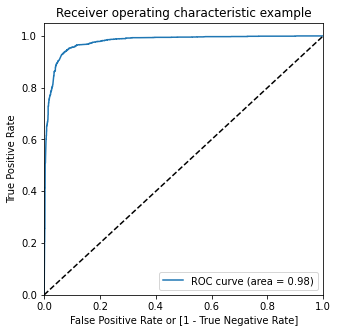

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


### Finding Optimal Cutoff Point <a class ="anchor" id="optimal">

In [127]:
#Above we had chosen an arbitrary cut-off value of 0.5

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.762797         6054          1    1    1    1    1    1   
1          1        0.978679         2828          1    1    1    1    1    1   
2          1        0.794514         1269          1    1    1    1    1    1   
3          1        0.988583         5120          1    1    1    1    1    1   
4          1        0.985165         7170          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    0    0  
1    1    1    1    1    1  
2    1    1    1    0    0  
3    1    1    1    1    1  
4    1    1    1    1    1

In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.466835  1.000000  0.000000
0.1   0.1  0.869228  0.985612  0.767323
0.2   0.2  0.899664  0.971223  0.837008
0.3   0.3  0.921285  0.962680  0.885039
0.4   0.4  0.930311  0.950540  0.912598
0.5   0.5  0.932410  0.933004  0.931890
0.6   0.6  0.926742  0.895683  0.953937
0.7   0.7  0.916247  0.865558  0.960630
0.8   0.8  0.895046  0.809353  0.970079
0.9   0.9  0.867128  0.732914  0.984646


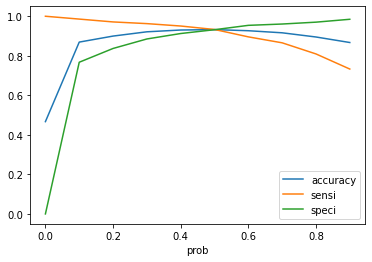

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [130]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.762797         6054          1    1    1    1    1    1   
1          1        0.978679         2828          1    1    1    1    1    1   
2          1        0.794514         1269          1    1    1    1    1    1   
3          1        0.988583         5120          1    1    1    1    1    1   
4          1        0.985165         7170          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    1    1    1    0    0                1  
1    1    1    1    1    1                1  
2    1    1    1    0    0                1  
3    1    1    1    1    1                1  
4    1    1    1    1    1                1

In [131]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          1        0.762797         6054                1          76
1          1        0.978679         2828                1          98
2          1        0.794514         1269                1          79
3          1        0.988583         5120                1          99
4          1        0.985165         7170                1          99

In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9212846347607053

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2248,  292],
       [  83, 2141]])

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9626798561151079

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.8850393700787401

**Inference**

The ROC curve has a value of 0.98, which is very good. We have the following values for the Train Data:

- Accuracy : 92.12%
- Sensitivity : 96.26%
- Specificity : 88.50%

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11496062992125984


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8799835593916975


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9643929643929644


In [140]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2248,  292],
       [  83, 2141]])

In [141]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8799835593916975

In [142]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9626798561151079

In [143]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8799835593916975

In [144]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9626798561151079

In [145]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

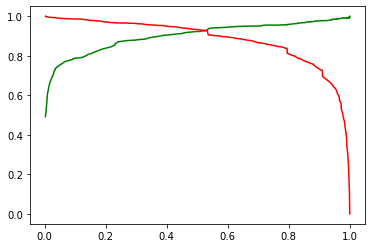

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3595    -1.147285                    -0.939116             -1.248269   
7018     0.526453                     2.175416             -0.420028   
2239     0.191706                     1.735531              0.735542   
3084     1.195949                    -0.531029              2.223399   
5928    -1.147285                    -0.939116             -1.248269   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3595                                    0                          0   
7018                                    1                          0   
2239                                    1                          0   
3084                                    1                          0   
5928                                    0                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
3595                        0                                          0   
7018                        0                                          0   
2239                        0                                          0   
3084                        0                                          0   
5928                        0                                          0   

      What is your current occupation_Other  \
3595                                      0   
7018                                      0   
2239                                      0   
3084                                      0   
5928                                      0   

      What is your current occupation_Student  \
3595                                        0   
7018                                        0   
2239                                        0   
3084                                        0   
5928                                        0   

      What is your current occupation_Unemployed  ...  \
3595                                           1  ...   
7018                                           1  ...   
2239                                           1  ...   
3084                                           1  ...   
5928                                           1  ...   

      Last Activity_Olark Chat Conversation  \
3595                                      1   
7018                                      0   
2239                                      0   
3084                                      0   
5928                                      1   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3595                                      0                       0   
7018                                      0                       1   
2239                                      0                       1   
3084                                      0                       1   
5928                                      0                       0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
3595          0                        0                                 0   
7018          0                        0                                 0   
2239          0                        0                                 0   
3084          0                        0                                 0   
5928          0                        0                                 0   

      Tags_Lost to EINS  Tags_Other_Tags  Tags_Ringing  \
3595                  0                1             0   
7018                  0                0             0   
2239                  0                0             0   
3084                  0                0             1   
5928                  0                1             0   

      Tags_Will revert after reading the email  
3595                                         0  
7018                                         0  
2239                                         1  
3084                                  

In [148]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
3595                    -0.939116                                    0   
7018                     2.175416                                    1   
2239                     1.735531                                    1   
3084                    -0.531029                                    1   
5928                    -0.939116                                    0   

      Lead Origin_Lead Add Form  \
3595                          0   
7018                          0   
2239                          0   
3084                          0   
5928                          0   

      What is your current occupation_Working Professional  \
3595                                                  0      
7018                                                  0      
2239                                                  0      
3084                                                  0      
5928                                                  0      

      Lead Source_Olark Chat  Last Activity_Email Bounced  \
3595                       1                            0   
7018                       0                            0   
2239                       0                            0   
3084                       0                            0   
5928                       1                            0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3595                                      1                       0   
7018                                      0                       1   
2239                                      0                       1   
3084                                      0                       1   
5928                                      1                       0   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
3595                                 0                  0                1   
7018                                 0                  0                0   
2239                                 0                  0                0   
3084                                 0                  0                0   
5928                                 0                  0                1   

      Tags_Ringing  Tags_Will revert after reading the email  
3595             0                                         0  
7018             0                                         0  
2239             0                                         1  
3084             1                                         0  
5928             0                                         0

In [149]:
X_test_sm = sm.add_constant(X_test)

### Prediction on Test set <a class ="anchor" id="prediction-test">

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

3595    0.007894
7018    0.940293
2239    0.995818
3084    0.006966
5928    0.007894
5862    0.444461
6826    0.981846
4250    0.998841
1493    0.021953
5420    0.002457
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head
y_pred_1.head()

0
3595  0.007894
7018  0.940293
2239  0.995818
3084  0.006966
5928  0.007894

In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3595  0.007894
1          1         7018  0.940293
2          1         2239  0.995818
3          0         3084  0.006966
4          0         5928  0.007894

In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [160]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         3595        0.007894
1          1         7018        0.940293
2          1         2239        0.995818
3          0         3084        0.006966
4          0         5928        0.007894

In [161]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [162]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         3595          0        0.007894           1
1         7018          1        0.940293          94
2         2239          1        0.995818         100
3         3084          0        0.006966           1
4         5928          0        0.007894           1

In [163]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [164]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         3595          0        0.007894           1                0
1         7018          1        0.940293          94                1
2         2239          1        0.995818         100                1
3         3084          0        0.006966           1                0
4         5928          0        0.007894           1                0

In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9123837493881547

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1012,  137],
       [  42,  852]])

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9530201342281879

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.8807658833768495

In [170]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8614762386248737

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9530201342281879

**Inference**

After running the model on the Test Data, below is the result obtained:

- Accuracy : 91.23%
- Sensitivity : 95.30%
- Specificity : 88.07%

### Final Inference <a class ="anchor" id="final">

##### Train Data:

- Accuracy : 92.12%
- Sensitivity : 96.26%
- Specificity : 88.50%


##### Test Data:
- Accuracy : 91.23%
- Sensitivity : 95.30%
- Specificity : 88.07%


we should be able to give the CEO confidence in making good calls based on this model